In [1]:
from LibLv1 import *
is_gpu_available()

TensorFlow version: 2.10.0
GPU disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU 0 est activé avec gestion dynamique de la mémoire.


True

In [ ]:
#create_balanced_no_photos_folder(r"C:\Users\aboui\Downloads\Dataset") 

In [2]:
data_dir = r'Dataset/Bindata/'
train_gen, val_gen = prepare_data(data_dir)

input_shape = (224, 224, 3)  
image_size = (224 , 224)

class_names = list(val_gen.class_names)

num_classes = len(class_names)
save_model_path = r"models/EfficientNet_Bin_best_weights.h5"


Found 19986 files belonging to 2 classes.
Using 15989 files for training.
Found 19986 files belonging to 2 classes.
Using 3997 files for validation.


In [3]:
efficientnet_model = create_efficientnet_model(
    input_shape=input_shape,
    class_count=num_classes,
    show_summary=True,
    dropout_rate=0.3,
    fine_tune_at=-1
)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 2,562
Non-trainable params: 4,049,571
_______________________________________________

In [4]:
history = TrainModel(
    model=efficientnet_model,
    train_set=train_gen,
    test_set=val_gen,
    nbEpochs=100,
    modelCheckpoint=save_model_path
)

Epoch 1/100
500/500 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.8455
Epoch 1: val_loss improved from inf to 0.22292, saving model to models\EfficientNet_Bin_best_weights.h5
500/500 [==============================] - 52s 91ms/step - loss: 0.3663 - accuracy: 0.8455 - val_loss: 0.2229 - val_accuracy: 0.9329
Epoch 2/100
499/500 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9387
Epoch 2: val_loss improved from 0.22292 to 0.15480, saving model to models\EfficientNet_Bin_best_weights.h5
500/500 [==============================] - 41s 82ms/step - loss: 0.1931 - accuracy: 0.9386 - val_loss: 0.1548 - val_accuracy: 0.9530
Epoch 3/100
499/500 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9530
Epoch 3: val_loss improved from 0.15480 to 0.12651, saving model to models\EfficientNet_Bin_best_weights.h5
500/500 [==============================] - 42s 84ms/step - loss: 0.1458 - accuracy: 0.9531 - val_loss: 0.1265 - val_accurac

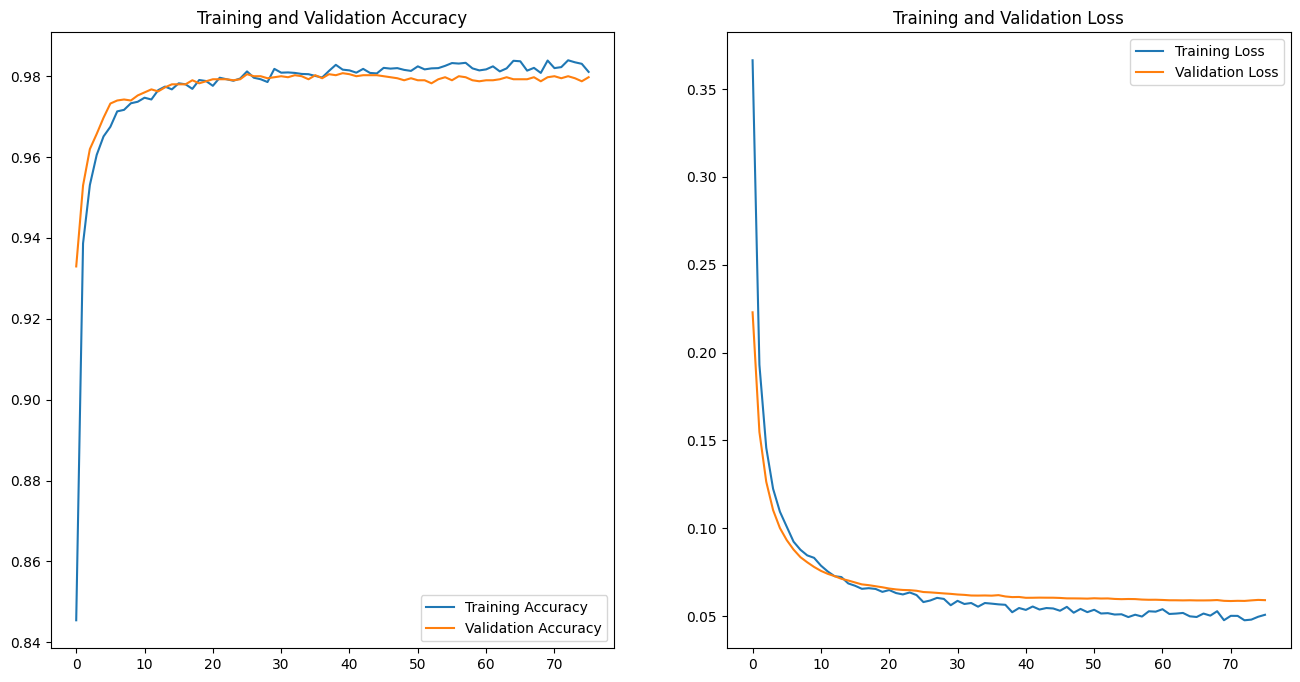

In [5]:
displayHistoryData(history.history['accuracy'] , history.history['val_accuracy'] , history.history['loss'], history.history['val_loss'] , len(history.history['accuracy'])) 

1/1 [==============================] - 2s 2s/step
Vérification des lignes (%): [100. 100.]


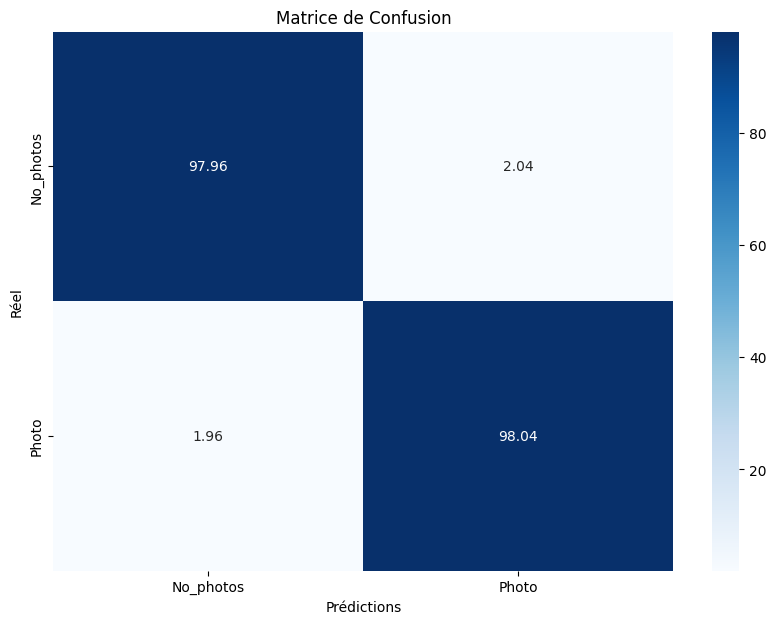

In [6]:
plot_confusion_matrix(efficientnet_model , val_gen , class_names)

125/125 [==============================] - 12s 72ms/step - loss: 0.0586 - accuracy: 0.9800
Évaluation sur le jeu de test - Accuracy: 0.98, Loss: 0.0586
1/1 [==============================] - 2s 2s/step
Classe prédite: No_photos avec une confiance de 1.00


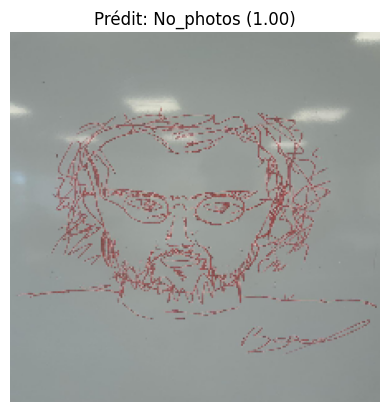

125/125 [==============================] - 9s 71ms/step - loss: 0.0586 - accuracy: 0.9800
Évaluation sur le jeu de test - Accuracy: 0.98, Loss: 0.0586
1/1 [==============================] - 0s 32ms/step
Classe prédite: Photo avec une confiance de 0.99


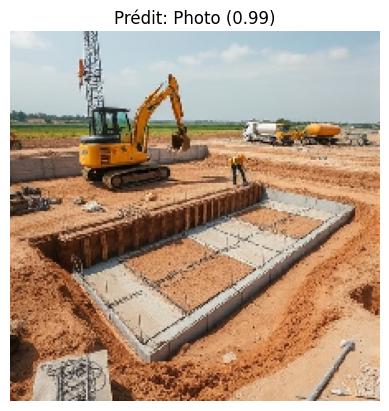

125/125 [==============================] - 9s 73ms/step - loss: 0.0586 - accuracy: 0.9800
Évaluation sur le jeu de test - Accuracy: 0.98, Loss: 0.0586
1/1 [==============================] - 0s 33ms/step
Classe prédite: Photo avec une confiance de 1.00


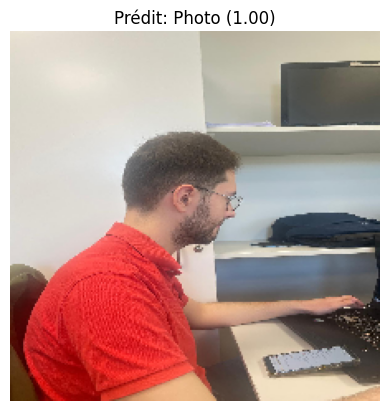

125/125 [==============================] - 9s 73ms/step - loss: 0.0586 - accuracy: 0.9800
Évaluation sur le jeu de test - Accuracy: 0.98, Loss: 0.0586
1/1 [==============================] - 0s 33ms/step
Classe prédite: No_photos avec une confiance de 1.00


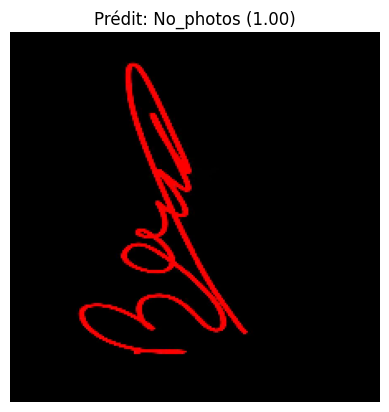

125/125 [==============================] - 9s 74ms/step - loss: 0.0586 - accuracy: 0.9800
Évaluation sur le jeu de test - Accuracy: 0.98, Loss: 0.0586
1/1 [==============================] - 0s 64ms/step
Classe prédite: No_photos avec une confiance de 1.00


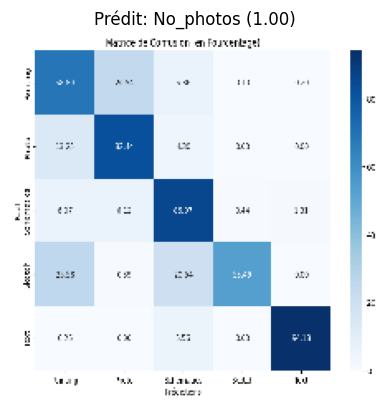

In [7]:
efficientnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
with tf.device('/GPU:1'):
    efficientnet_model.load_weights(save_model_path)
    test_model(efficientnet_model, val_gen, "testResult/lorenzo.jpg", class_names  , image_size )
    test_model(efficientnet_model, val_gen, "testResult/7b3cb7d3-c8e0-4852-97df-017ceac60c23.jpeg", class_names , image_size)
    test_model(efficientnet_model, val_gen, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_57384aa3.jpg", class_names , image_size)
    test_model(efficientnet_model, val_gen, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_b655e5ba.jpg", class_names , image_size)
    test_model(efficientnet_model, val_gen, "testResult/output.png", class_names , image_size)